In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
df = pd.read_csv("D:/kulyah/bigdata/fp/dataset/heart.csv")

In [51]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [52]:
df.shape

(918, 12)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [79]:
# Kamus untuk mengganti kembali angka ke string
sex_mapping = {1: 'M', 0: 'F'}
heart_disease_mapping = {1: 'M', 0: 'F'}
exercise_angina_mapping = {1: 'Y', 0: 'N'}
st_slope_mapping = {1: 'Up', 2: 'Down', 0: 'Flat'}
resting_ecg_mapping = {1: 'ST', 2: 'LVH', 0: 'Normal'}
chest_pain_type_mapping = {0: 'ASY', 1: 'TA', 2: 'ATA', 3: 'NAP'}

# Mengganti kembali angka ke string menggunakan map
df['Sex'] = df['Sex'].map(sex_mapping)
df['HeartDisease'] = df['HeartDisease'].map(heart_disease_mapping)
df['ExerciseAngina'] = df['ExerciseAngina'].map(exercise_angina_mapping)
df['ST_Slope'] = df['ST_Slope'].map(st_slope_mapping)
df['RestingECG'] = df['RestingECG'].map(resting_ecg_mapping)
df['ChestPainType'] = df['ChestPainType'].map(chest_pain_type_mapping)


In [80]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,F
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,M
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,F
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,M
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,F


In [81]:
# Mengganti string ke int
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
df['HeartDisease'] = df['HeartDisease'].replace({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'Y': 1, 'N': 0})
df['ST_Slope'] = df['ST_Slope'].replace({'Up': 1, 'Down': 2, 'Flat': 0})
df['RestingECG'] = df['RestingECG'].replace({'ST': 1, 'LVH': 2, 'Normal': 0})
df['ChestPainType'] = df['ChestPainType'].replace({'ASY': 0, 'TA': 1, 'ATA': 2, 'NAP': 3})

In [82]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,0,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [58]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.090414,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.567538,0.553377
std,9.432617,0.407701,1.267622,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.618959,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,0.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


## Data Visualization

In [59]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


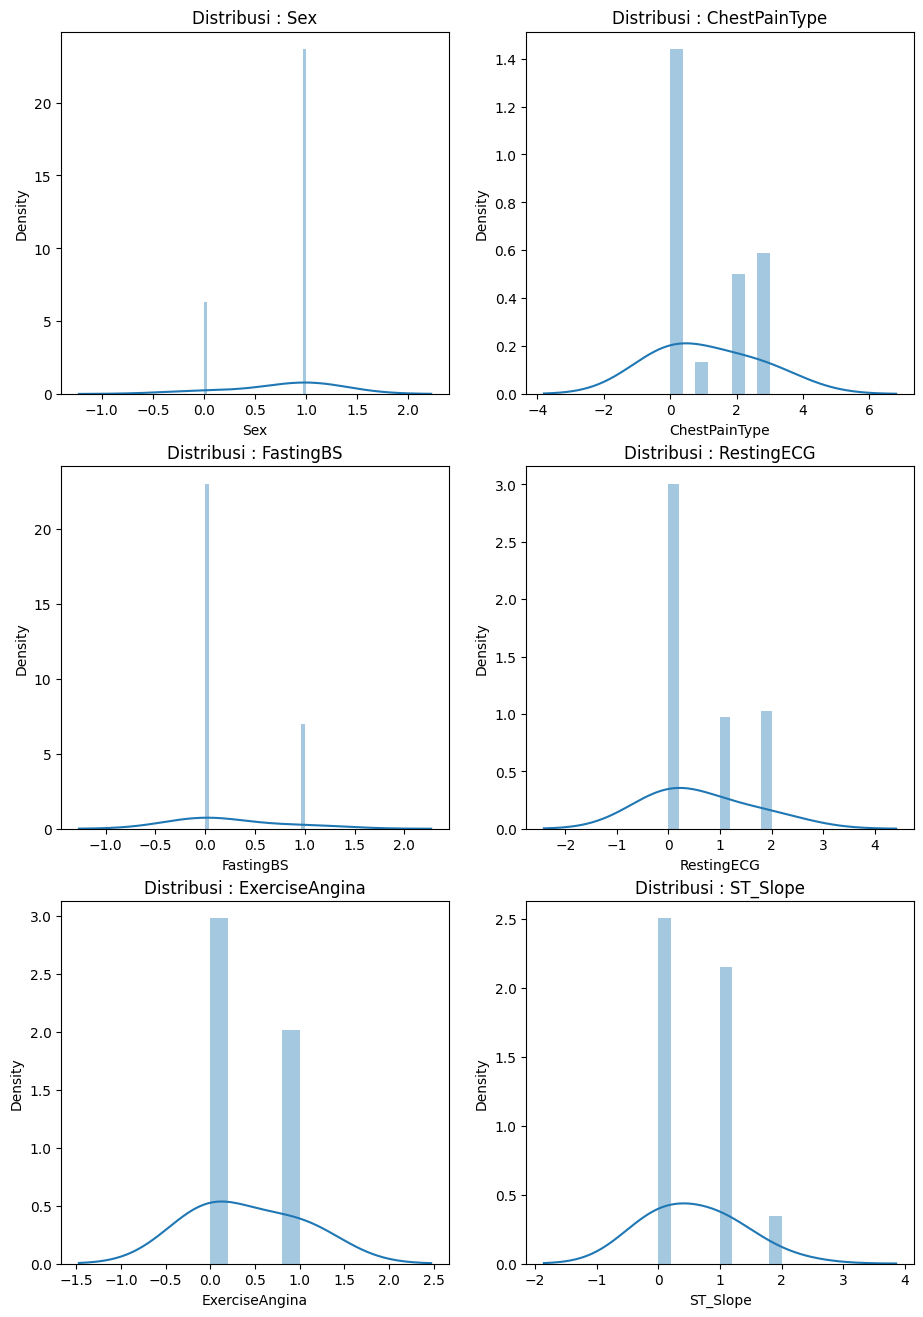

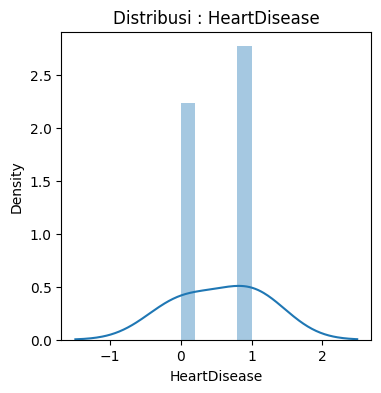

In [60]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (11,16))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribusi : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4,4))
sns.distplot(df[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1})
title = 'Distribusi : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

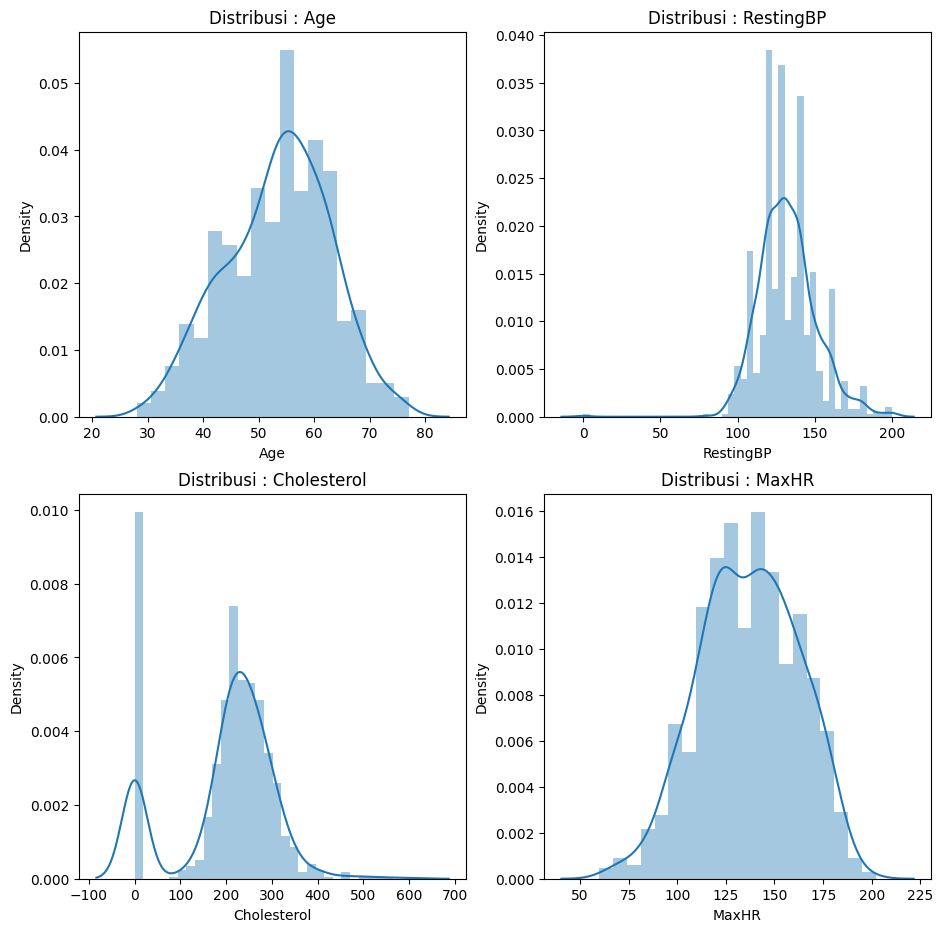

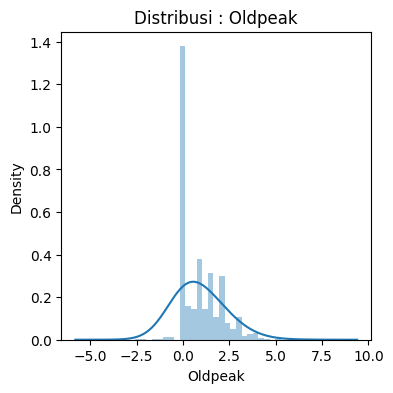

In [61]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (11,11))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(df[numerical_features[i]])
    title = 'Distribusi : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4,4))
sns.distplot(df[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1})
title = 'Distribusi : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

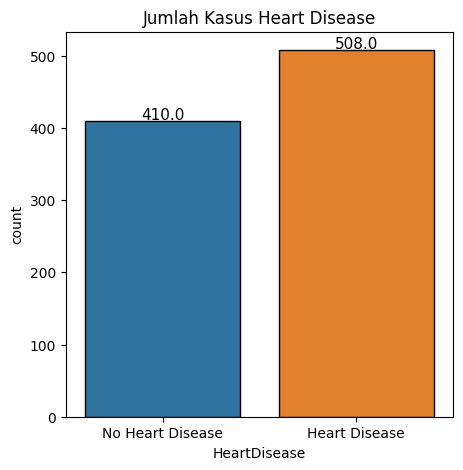

In [62]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='HeartDisease', data=df, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Jumlah Kasus Heart Disease')
plt.show()

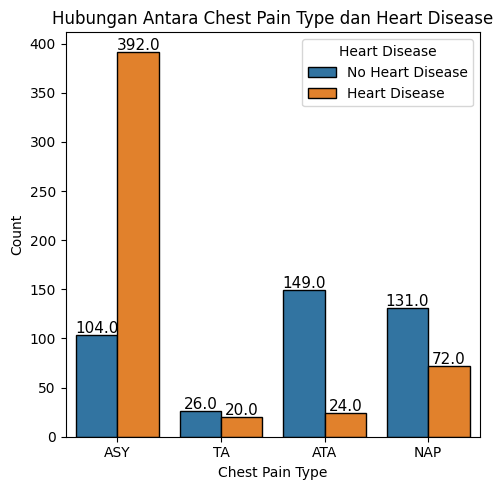

In [63]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
# Atur label sumbu x dan y
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Hubungan Antara Chest Pain Type dan Heart Disease')
ax.set_xticklabels(['ASY', 'TA','ATA', 'NAP'])
# Tambahkan legenda
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

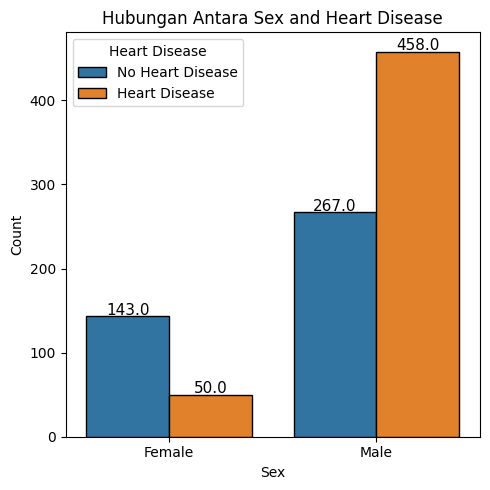

In [64]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Sex', hue='HeartDisease', data=df, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
# Atur label sumbu x dan y
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Hubungan Antara Sex and Heart Disease')
ax.set_xticklabels(['Female', 'Male'])
# Tambahkan legenda
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

# Analisis Korelasi

<Axes: >

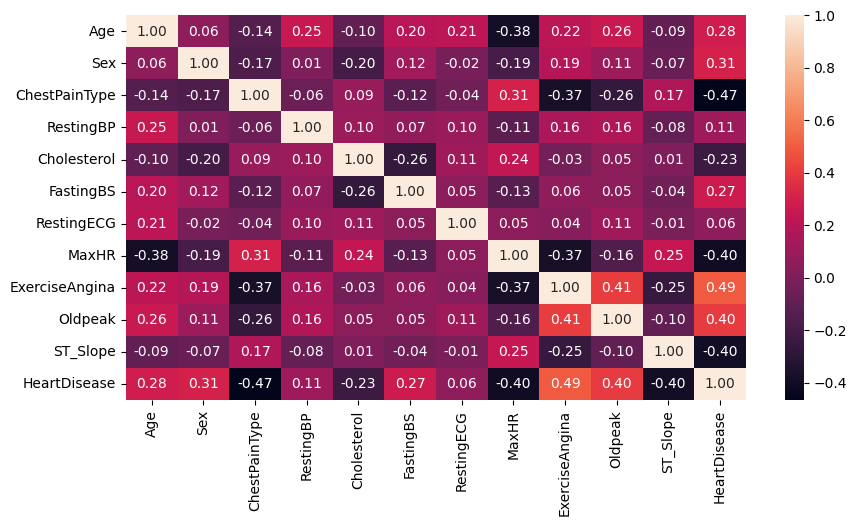

In [65]:
plt.figure(figsize=(10, 5))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

In [66]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [67]:
def linear_regression(bebas, target, test_size, random_state):
    X = df[bebas]
    y = df[target]

    # Split dataset (train, test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Model regresi
    regr = LinearRegression()
    regr.fit(X_train, y_train)

    # Mencari nilai coef dan intercept
    intercept = regr.intercept_
    coef = regr.coef_

    # Prediksi
    pred = regr.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

    # Mengembalikan hasil
    result = {
        'X_train_shape': X_train.shape,
        'X_test_shape': X_test.shape,
        'y_train_shape': y_train.shape,
        'y_test_shape': y_test.shape,
        'intercept': intercept,
        'coef': coef,
        'rmse': rmse
    }

    return result

#### Model menggunakan 2 variable dengan corr > 0.4

In [68]:
model1_1 = linear_regression(['ExerciseAngina', 'Oldpeak'], 'HeartDisease', 0.2, 10)
model1_1

{'X_train_shape': (734, 2),
 'X_test_shape': (184, 2),
 'y_train_shape': (734,),
 'y_test_shape': (184,),
 'intercept': 0.29304340039374316,
 'coef': array([0.41775083, 0.10483787]),
 'rmse': 0.4318146403938142}

In [69]:
model1_2 = linear_regression(['ExerciseAngina', 'Oldpeak'], 'HeartDisease', 0.25, 10)
model1_2

{'X_train_shape': (688, 2),
 'X_test_shape': (230, 2),
 'y_train_shape': (688,),
 'y_test_shape': (230,),
 'intercept': 0.2931091254592244,
 'coef': array([0.40948861, 0.10693666]),
 'rmse': 0.4246334994752739}

In [70]:
model1_3 = linear_regression(['ExerciseAngina', 'Oldpeak'], 'HeartDisease', 0.3, 10)
model1_3

{'X_train_shape': (642, 2),
 'X_test_shape': (276, 2),
 'y_train_shape': (642,),
 'y_test_shape': (276,),
 'intercept': 0.2866197438484702,
 'coef': array([0.40896724, 0.11222835]),
 'rmse': 0.428351813659149}

#### Model menggunakan 5 variable dengan corr > 0.2

In [71]:
model2_1 = linear_regression(['Age', 'Sex', 'ExerciseAngina', 'Oldpeak', 'FastingBS'], 'HeartDisease', 0.2, 10)
model2_1

{'X_train_shape': (734, 5),
 'X_test_shape': (184, 5),
 'y_train_shape': (734,),
 'y_test_shape': (184,),
 'intercept': -0.20429559454547952,
 'coef': array([0.00534586, 0.25593808, 0.3535757 , 0.09110904, 0.21436222]),
 'rmse': 0.407457212558858}

In [72]:
model2_2 = linear_regression(['Age', 'Sex', 'ExerciseAngina', 'Oldpeak', 'FastingBS'], 'HeartDisease', 0.25, 20)
model2_2

{'X_train_shape': (688, 5),
 'X_test_shape': (230, 5),
 'y_train_shape': (688,),
 'y_test_shape': (230,),
 'intercept': -0.2607773935847605,
 'coef': array([0.00674722, 0.23483972, 0.31877188, 0.10534247, 0.20781576]),
 'rmse': 0.3869777028354409}

In [73]:
model2_3 = linear_regression(['Age', 'Sex', 'ExerciseAngina', 'Oldpeak', 'FastingBS'], 'HeartDisease', 0.3, 10)
model2_3

{'X_train_shape': (642, 5),
 'X_test_shape': (276, 5),
 'y_train_shape': (642,),
 'y_test_shape': (276,),
 'intercept': -0.18599862508808873,
 'coef': array([0.00496738, 0.25186861, 0.34512815, 0.09969412, 0.19962763]),
 'rmse': 0.3959763275240724}

#### Model menggunakan 3 variable dengan corr < 1

In [74]:
model3_1 = linear_regression(['ChestPainType', 'MaxHR', 'ST_Slope'], 'HeartDisease', 0.2, 10)
model3_1

{'X_train_shape': (734, 3),
 'X_test_shape': (184, 3),
 'y_train_shape': (734,),
 'y_test_shape': (184,),
 'intercept': 1.4682565513001653,
 'coef': array([-0.14391845, -0.00458962, -0.22467669]),
 'rmse': 0.4331588468719196}

In [75]:
model3_2 = linear_regression(['ChestPainType', 'MaxHR', 'ST_Slope'], 'HeartDisease', 0.25, 10)
model3_2

{'X_train_shape': (688, 3),
 'X_test_shape': (230, 3),
 'y_train_shape': (688,),
 'y_test_shape': (230,),
 'intercept': 1.4310666006976858,
 'coef': array([-0.14611601, -0.00427318, -0.23280196]),
 'rmse': 0.427398338545207}

In [76]:
model3_3 = linear_regression(['ChestPainType', 'MaxHR', 'ST_Slope'], 'HeartDisease', 0.3, 10)
model3_3

{'X_train_shape': (642, 3),
 'X_test_shape': (276, 3),
 'y_train_shape': (642,),
 'y_test_shape': (276,),
 'intercept': 1.4110286295070682,
 'coef': array([-0.14867444, -0.0041017 , -0.23491365]),
 'rmse': 0.42639598655954847}